In [33]:
import cogsworth
import gala.potential as gp
import astropy.units as u
import matplotlib.pyplot as plt

In [34]:
# this all just makes plots look nice
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

In [2]:
p = cogsworth.pop.Population(n_binaries=100, processes=4, m1_cutoff=0,
                             final_kstar1=list(range(16)), final_kstar2=list(range(16)),
                             galaxy_model=cogsworth.galaxy.Frankel2018,
                             galactic_potential=gp.MilkyWayPotential(), v_dispersion=5 * u.km / u.s,
                             max_ev_time=12.0 * u.Gyr, timestep_size=1 * u.Myr,
                             BSE_settings={}, sampling_params={}, store_entire_orbits=True)

In [58]:
p = cogsworth.pop.Population(n_binaries=1000, processes=4, max_ev_time=12.0 * u.Gyr)

In [56]:
# now let's get the initital stellar population
p.sample_initial_binaries()
p._initial_binaries

,kstar_1,kstar_2,mass_1,mass_2,porb,ecc,metallicity,tphysf,mass0_1,mass0_2,...,tacc_1,tacc_2,epoch_1,epoch_2,tms_1,tms_2,bhspin_1,bhspin_2,tphys,binfrac
0,1.0,0.0,0.826873,0.174242,643.626384,0.149767,0.014183,7170.859407,0.826873,0.174242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
1,0.0,0.0,0.309935,0.094890,2892.484581,0.020541,0.017614,2358.744051,0.309935,0.094890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
2,0.0,0.0,0.217673,0.156915,2.698509,0.057671,0.014932,4048.209078,0.217673,0.156915,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
3,1.0,1.0,4.480311,3.479774,1531.184684,0.021850,0.001799,4827.283397,4.480311,3.479774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
4,1.0,0.0,0.730858,0.163358,21.026967,0.138519,0.003580,11196.272242,0.730858,0.163358,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,0.0,0.0,0.178923,0.128637,7.755822,0.072857,0.030000,781.134963,0.178923,0.128637,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
1342,0.0,0.0,0.292752,0.146912,4595.452190,0.072138,0.008561,10069.259410,0.292752,0.146912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
1343,0.0,0.0,0.243690,0.143922,1.890124,0.079651,0.000756,7850.909568,0.243690,0.143922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
1344,0.0,0.0,0.216608,0.211161,996.954214,0.737501,0.001906,10807.435382,0.216608,0.211161,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


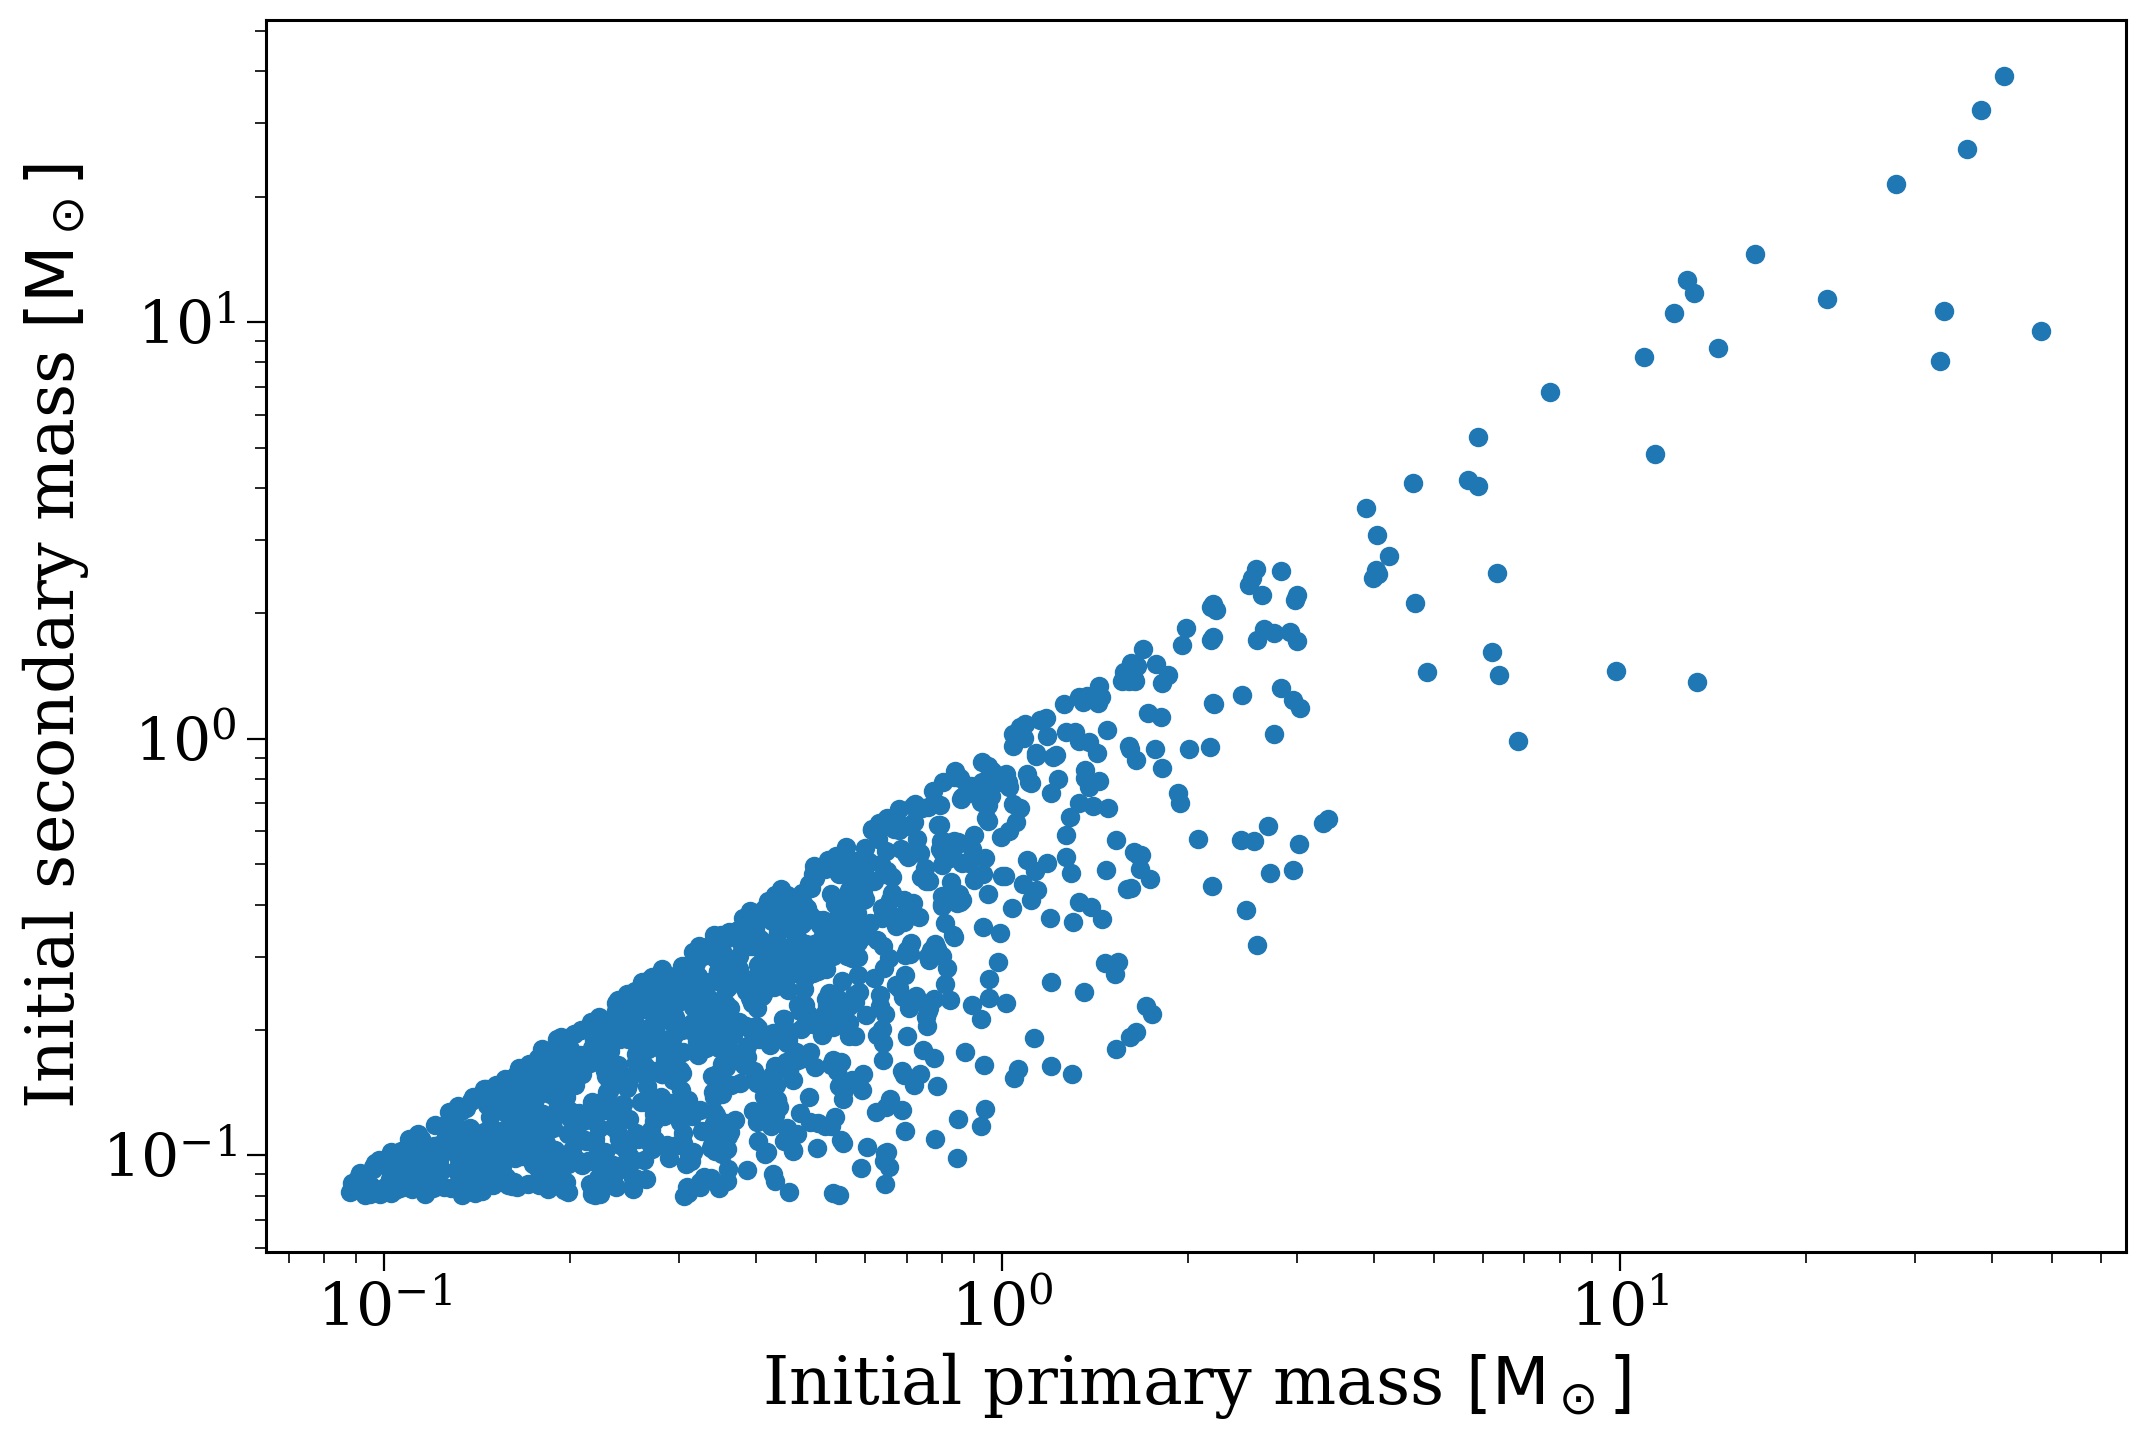

In [73]:
fig, ax = plt.subplots()
ax.scatter(p._initial_binaries["mass_1"], p._initial_binaries["mass_2"])
ax.set(xscale="log", yscale="log",
       xlabel=r"Initial primary mass $[\rm M_\odot]$", ylabel=r"Initial secondary mass $[\rm M_\odot]$")
plt.show()

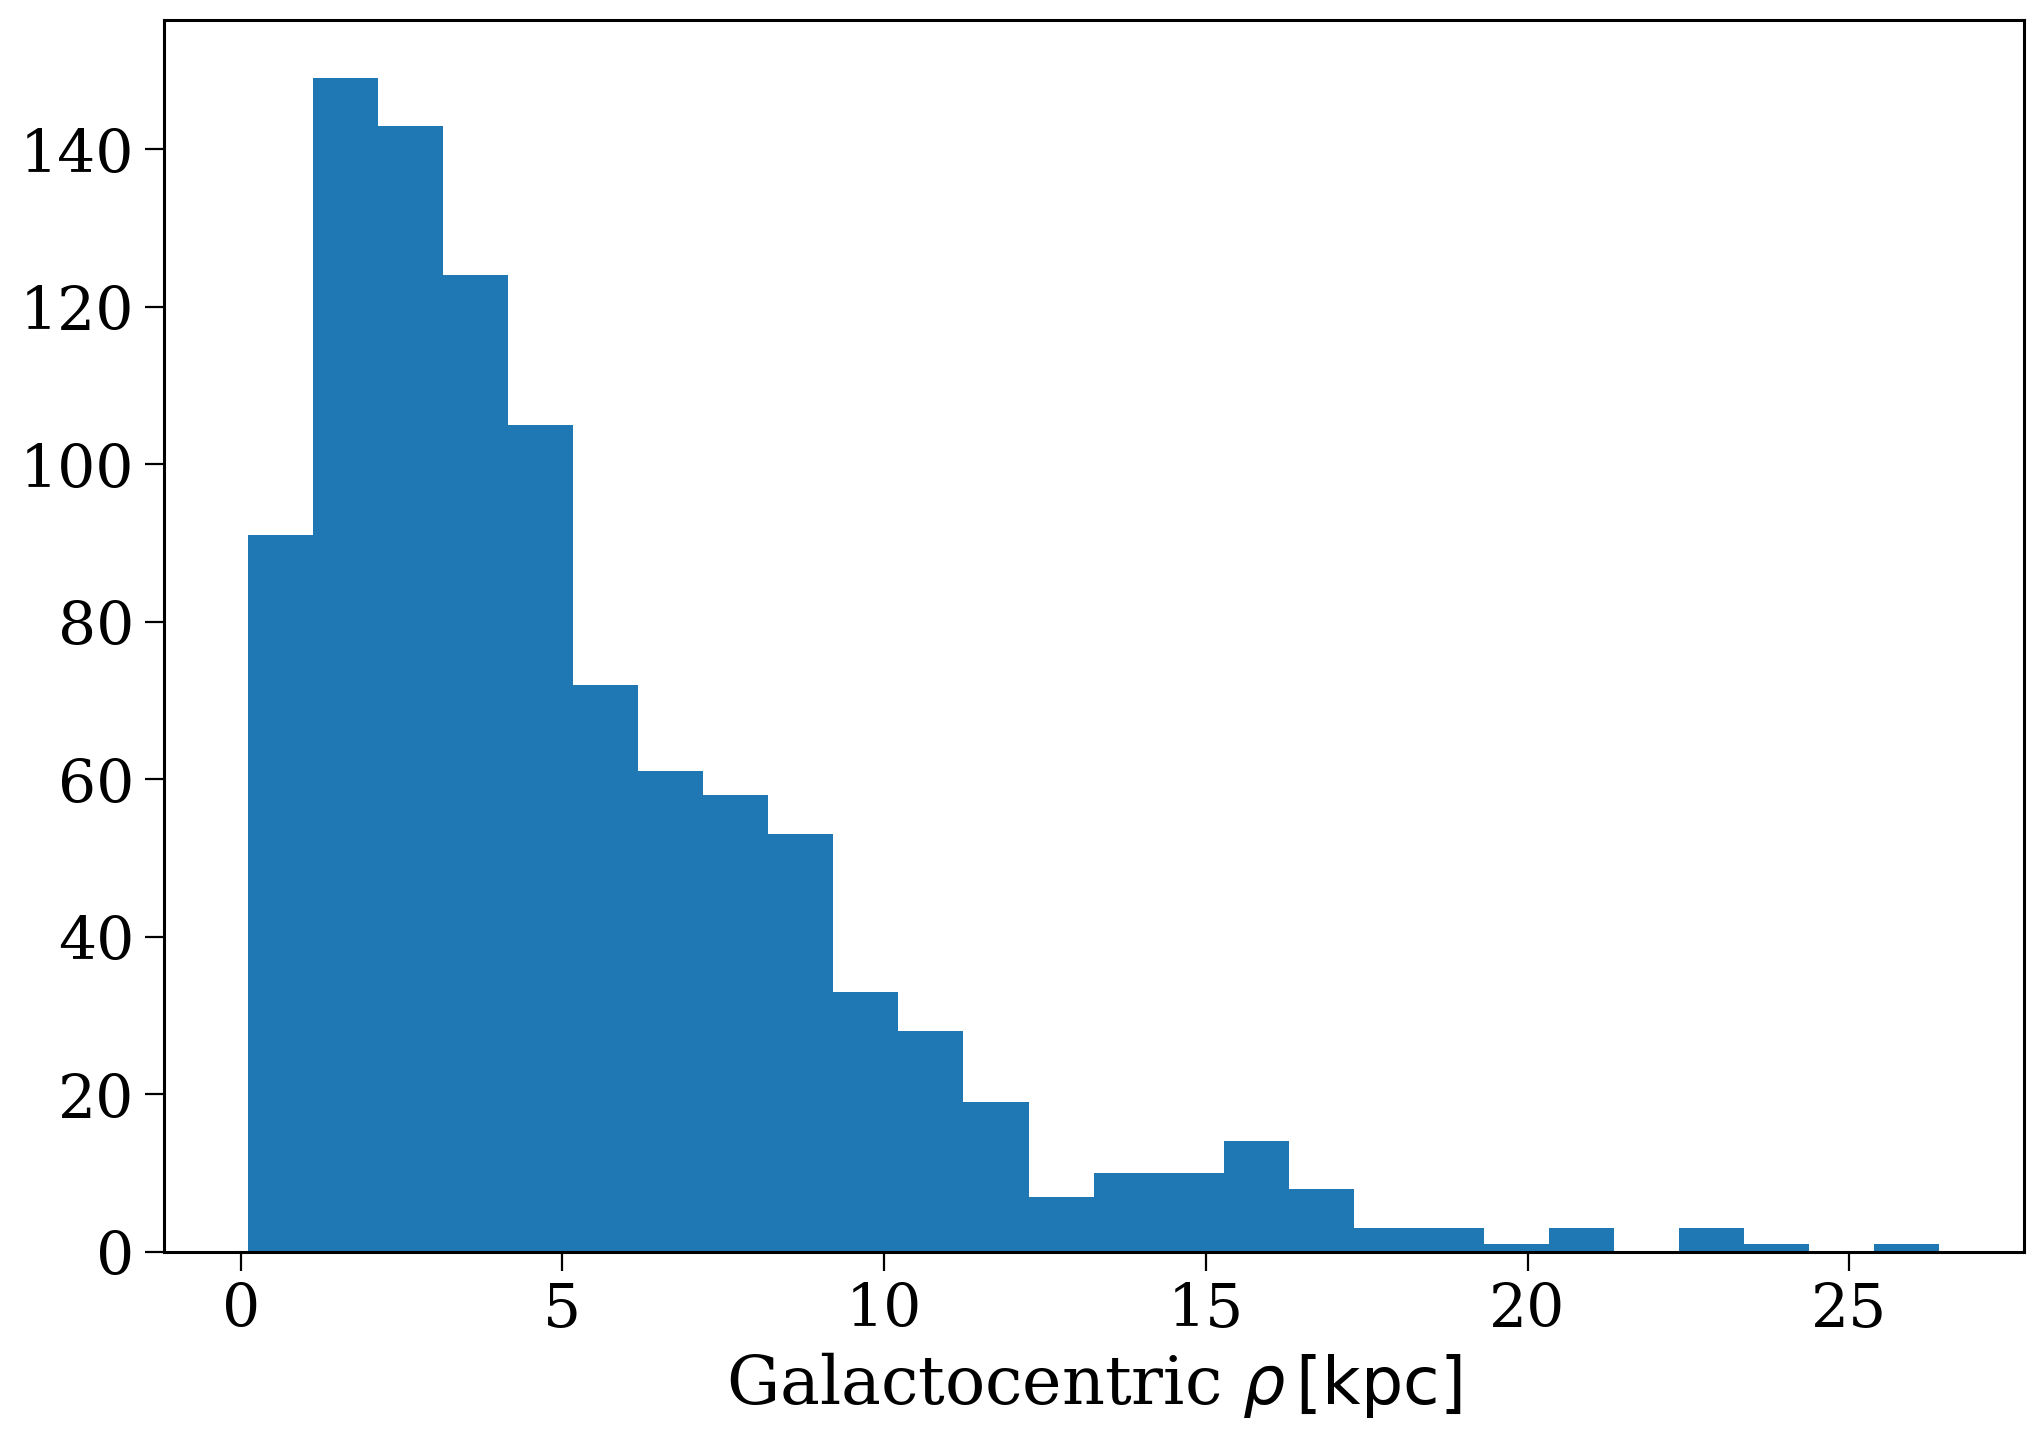

In [59]:
# first let's sample the initial galaxy
p.sample_initial_galaxy()

# and check distributions look normal
plt.hist(p.initial_galaxy.rho.value, bins="fd");
plt.xlabel(r"Galactocentric $\rho \, [\rm kpc]$");

In [76]:
p.perform_stellar_evolution()
p.bpp

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,...,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num
0,0.000000,2.587520,1.726655,1.0,1.0,320.895803,320.751949,0.222611,0.016746,0.016925,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0
0,533.936923,2.587520,1.726655,2.0,1.0,320.895803,320.751948,0.222611,0.038648,0.019311,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0
0,537.608048,2.587351,1.726656,3.0,1.0,320.908266,320.776930,0.222611,0.102429,0.019331,...,0.0,0.0,0.0,0.0,0.0,-0.094734,0.000338,0.0,0.0,0
0,541.689318,2.586310,1.726673,4.0,1.0,322.289261,322.888125,0.223314,0.338717,0.019288,...,0.0,0.0,0.0,0.0,0.0,-0.094734,0.015833,0.0,0.0,0
0,682.463596,2.563133,1.726934,5.0,1.0,324.257449,326.719509,0.212690,0.225163,0.019782,...,0.0,0.0,0.0,0.0,0.0,-0.094734,0.284894,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,9986.328392,0.168585,0.123044,0.0,0.0,51.262438,78.769085,0.828032,0.054149,0.046758,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1304
1305,0.000000,0.517555,0.220173,0.0,0.0,29.811959,21.963915,0.423065,0.060804,0.047548,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1305
1305,5204.673564,0.517555,0.220173,0.0,0.0,29.811653,21.963577,0.423060,0.061228,0.047599,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1305
1306,0.000000,0.732483,0.234253,1.0,0.0,12.019502,4.911881,0.019983,0.120096,0.075811,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1306


In [85]:
# print out some evolution information for a massive binary
p.bpp.loc[p.initC[p.initC["mass_1"] > 35]["bin_num"].iloc[0]]

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,...,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num
361,0.000000,38.380534,32.317599,1.0,1.0,65.452486,7.298900,0.107633,0.453037,0.437410,...,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,361
361,3.936185,34.221393,30.056583,1.0,1.0,67.941582,8.095516,0.000000,1.001917,0.752861,...,0.000000e+00,0.0,0.0,0.0,0.0,-0.150641,-0.116080,0.0,0.0,361
361,4.522113,31.915883,31.432218,2.0,1.0,67.224921,8.026031,0.000000,1.298559,0.916939,...,0.000000e+00,0.0,0.0,0.0,0.0,-0.365559,0.270095,0.0,0.0,361
361,4.528787,25.180764,38.155177,4.0,1.0,67.063643,7.997933,0.000000,83.305932,0.700464,...,0.000000e+00,0.0,0.0,0.0,0.0,-0.365559,1.424084,0.0,0.0,361
361,4.531112,10.587116,52.736127,4.0,1.0,181.659103,35.659589,0.000000,0.503246,0.203343,...,0.000000e+00,0.0,0.0,0.0,0.0,-0.365559,2.590533,0.0,0.0,361
361,4.536467,10.570754,52.722728,7.0,1.0,181.678582,35.673709,0.000000,0.021228,0.203569,...,0.000000e+00,0.0,0.0,0.0,0.0,4.527994,2.590352,0.0,0.0,361
361,5.328341,5.540797,49.432179,8.0,1.0,208.901370,47.196465,0.000000,0.014535,0.209476,...,0.000000e+00,0.0,0.0,0.0,0.0,4.280836,2.531854,0.0,0.0,361
361,5.392359,5.168219,49.192532,8.0,1.0,211.188016,48.242893,0.000000,0.014535,0.209476,...,0.000000e+00,0.0,0.0,0.0,0.0,4.280836,2.526348,0.0,0.0,361
361,5.392359,1.914722,49.192532,13.0,1.0,-1.000000,-1.000000,-1.000000,0.000000,-2.000000,...,0.000000e+00,0.0,0.0,0.0,0.0,5.392359,2.526348,0.0,0.0,361
361,6.431024,1.914722,38.099159,13.0,2.0,-1.000000,-1.000000,-1.000000,0.000100,0.000100,...,0.000000e+00,0.0,0.0,0.0,0.0,5.392359,2.055531,0.0,0.0,361


In [86]:
p.perform_galactic_evolution()
p.orbits

1316it [00:08, 148.10it/s]                                                                              


array([<Orbit cartesian, dim=3, shape=(9341,)>,
       <Orbit cartesian, dim=3, shape=(7048,)>,
       <Orbit cartesian, dim=3, shape=(2,)>, ...,
       <Orbit cartesian, dim=3, shape=(7637,)>,
       <Orbit cartesian, dim=3, shape=(7249,)>,
       <Orbit cartesian, dim=3, shape=(3917,)>], dtype=object)

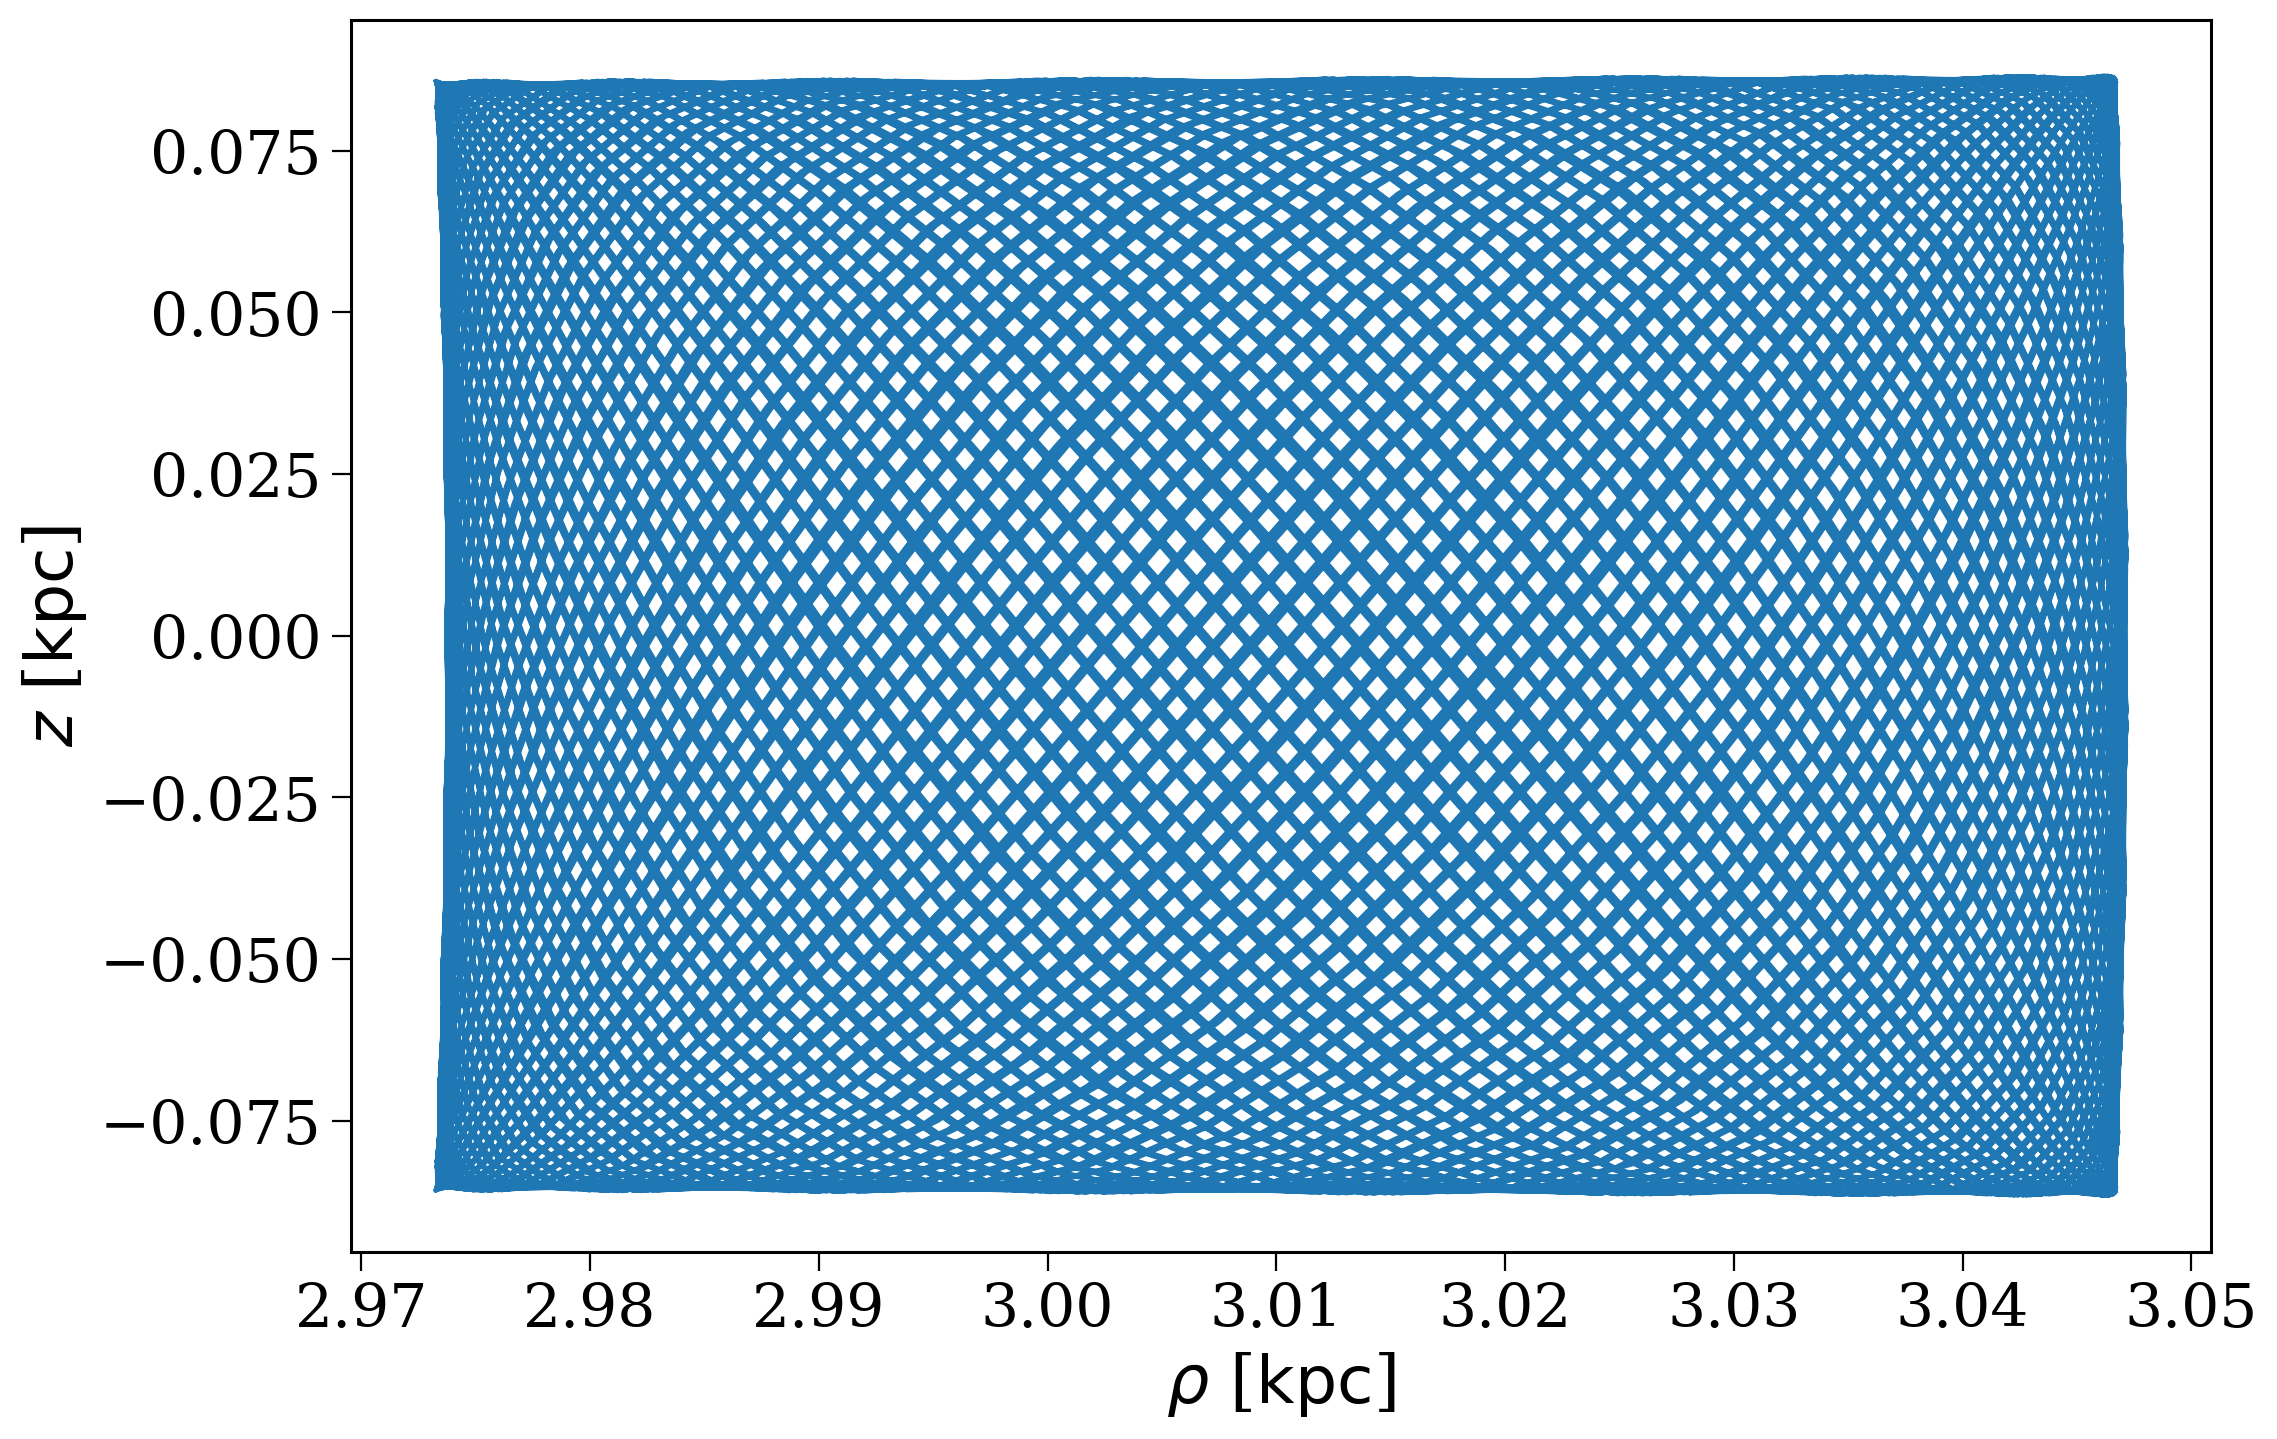

In [90]:
fig, ax = plt.subplots()
p.orbits[0].cylindrical.plot(["rho", "z"], axes=[ax]);

In [91]:
p.create_population()

Run for 1000 binaries
Ended up with 1011 binaries with m1 > 0 solar masses
[3e-02s] Sample initial binaries
[0.9s] Evolve binaries (run COSMIC)


1015it [00:06, 155.88it/s]                                                                              


[9.2s] Get orbits (run gala)
Overall: 10.2s


Check out the next tutorial to learn more about interpretting the outputs of these simulations.